In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

sns.set()

The neighbors.LocalOutlierFactor (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors. Check [this source](https://scikit-learn.org/stable/modules/outlier_detection.html#local-outlier-factor) for more information

When applying LOF for outlier detection, there are no predict, decision_function and score_samples methods but only a fit_predict method. The scores of abnormality of the training samples are accessible through the negative_outlier_factor_ attribute. Note that predict, decision_function and score_samples can be used on new unseen data when LOF is applied for novelty detection, i.e. when the novelty parameter is set to True

# Data

In [2]:
# Train Data

# the higher the std_dev, the more difficult will be to differentiate regulars and outliers
# a std dev = 1, and this dataset will be impossible to distinguish
std_dev=0.4 

# drawing 100x2 data points from a normal N(0,1) * std_dev
X = std_dev * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2, X+[-2,2], X+[2,-2]]

In [8]:
# Test Data

# Regular New observations
X = std_dev * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2, X+[-2,2], X+[2,-2]]

# Outlier observations
X_outliers = np.random.uniform(low=-5, high=5, size=(10, 2))

# Novelty Detection

In [9]:
clf = LocalOutlierFactor(novelty=True)
clf.fit(X_train)

LocalOutlierFactor(novelty=True)

In [10]:
# Classify features

#y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_outliers = clf.predict(X_outliers)

_Warning Novelty detection with Local Outlier Factor_:

When novelty is set to True be aware that you must only use predict, decision_function and score_samples on new unseen data and not on the training samples as this would lead to wrong results. The scores of abnormality of the training samples are always accessible through the negative_outlier_factor_ attribute.

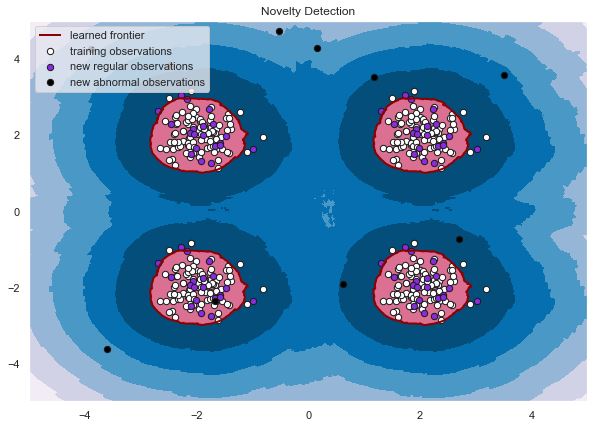

In [11]:
# plot the line, the points, and the nearest vectors to the plane

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# the classifier's learned frontiers
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="black", s=s, edgecolors="k")
#plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.title("Novelty Detection")
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc = "upper left",
    prop = matplotlib.font_manager.FontProperties(size=11),
)

plt.show()

# Outlier detection

For outlier detection, we must group train and outliers in the same array, and apply fit_predict method, instead.

In [21]:
X_all=np.r_[X_train, X_outliers]

size_train=len(X_train)
size_outliers=len(X_outliers)

In [19]:
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred = clf.fit_predict(X_all)

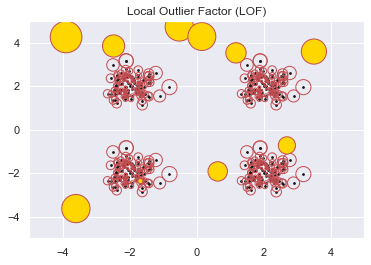

In [23]:
X_scores = clf.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_all[:, 0], X_all[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X_all[:size_train, 0],
    X_all[:size_train, 1],
    s=1000 * radius[:size_train],
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.scatter(
    X_all[-size_outliers:, 0],
    X_all[-size_outliers:, 1],
    s=1000 * radius[-size_outliers:],
    edgecolors="r",
    facecolors="gold",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
#plt.xlabel("prediction errors: %d" % (n_errors))
#legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

Outliers are at the center of the yellow circles, which happen to be those with biggest outlier scores.